In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models

## Gathering Data from dataset Folder

### Training Data

In [2]:
X =[]
Y =[]
target_size=(224,224)

In [3]:
def image_process(directory_path):
    image_paths = [f for f in os.listdir(directory_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    for image_path in image_paths:
        full_path = os.path.join(directory_path, image_path)
        img = Image.open(full_path)
        img = img.resize(target_size)
        img_array = np.array(img)
        normalized_image_data = (img_array * 255).astype(np.uint8)
        if "cat" in image_path:
            Y.append(0)
        elif "dog" in image_path:
            Y.append(1)
        X.append(normalized_image_data)    

In [4]:
cat_path = "./Dataset/training_set/cats"
dog_path = "./Dataset/training_set/dogs"
# for cat
image_process(cat_path)
# for dogs
image_process(dog_path)


### Test Data

In [5]:
cat_path = "./Dataset/test_set/cats"
dog_path = "./Dataset/test_set/dogs"
# for cat
image_process(cat_path)
# for dogs
image_process(dog_path)

In [6]:
X = np.array(X)
Y = np.array(Y)

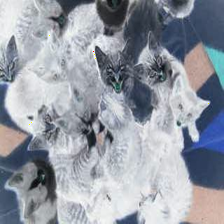

0


In [7]:
image_pil = Image.fromarray(X[1000])
display(image_pil)
print(Y[1000])

In [8]:
X.shape

(10028, 224, 224, 3)

In [9]:
X_train , X_test ,y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
X_train.shape

(7521, 224, 224, 3)

In [11]:
y_train.shape

(7521,)

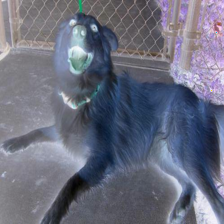

1


In [12]:
display(Image.fromarray(X_train[5]))
print(y_train[5])

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
model = models.Sequential([
    # convo layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.fit(X_train_scaled , y_train_scaled,epochs=5)

In [18]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 15s 192ms/step - loss: 3.3328 - accuracy: 0.5967


[3.332751989364624, 0.5967291593551636]